# Visualization of inversion - complex data

In [86]:
import matplotlib as mpb

# show all the matplotlib backends 
#mpb.rcsetup.all_backends 

# force matplotlib to use the 'Qt5Agg' backend 
#mpb.use(arg='Qt5Agg', force=True)

In [87]:
import numpy as np
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import scipy.stats as sp
import pandas as pd

from fatiando.gravmag import polyprism
from fatiando.vis import mpl
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from IPython.display import Image as img

In [88]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [89]:
L1u0_dir = 'data/real_obs_pts/L1_tfa_inversion/upper_inter_body/V20_L10_inc-50_dec9_r800_int12_z00_dz650/'
L2u0_dir = 'data/real_obs_pts/tfa_inversion/upper_inter_body/V20_L10_inc-50_dec9_r800_int12_z00_dz650/'
L1u130_dir = 'data/real_obs_pts/L1_tfa_inversion/upper_inter_body/V20_L10_inc-50_dec9_r800_int12_z0130_dz650/'
L2u130_dir = 'data/real_obs_pts/tfa_inversion/upper_inter_body/V20_L10_inc-50_dec9_r800_int12_z0130_dz650/'

L1ud0_dir = 'data/real_obs_pts/L1_tfa_inversion/upper_inter_body_1200/V20_L10_inc-50_dec9_r800_int12_z00_dz650/'
L2ud0_dir = 'data/real_obs_pts/tfa_inversion/upper_inter_body_1200/V20_L10_inc-50_dec9_r800_int12_z00_dz650/'
L1ud130_dir = 'data/real_obs_pts/L1_tfa_inversion/upper_inter_body_1200/V20_L10_inc-50_dec9_r800_int12_z0130_dz650/'
L2ud130_dir = 'data/real_obs_pts/tfa_inversion/upper_inter_body_1200/V20_L10_inc-50_dec9_r800_int12_z0130_dz650/'

In [90]:
with open(L1u0_dir+'inversion.pickle') as w:
        L1u0 = pickle.load(w)
with open(L2u0_dir+'inversion.pickle') as w:
        L2u0 = pickle.load(w)
with open(L1u130_dir+'inversion.pickle') as w:
        L1u130 = pickle.load(w)
with open(L2u130_dir+'inversion.pickle') as w:
        L2u130 = pickle.load(w)
with open(L1ud0_dir+'inversion.pickle') as w:
        L1ud0 = pickle.load(w)
with open(L2ud0_dir+'inversion.pickle') as w:
        L2ud0 = pickle.load(w)
with open(L1ud130_dir+'inversion.pickle') as w:
        L1ud130 = pickle.load(w)
with open(L2ud130_dir+'inversion.pickle') as w:
        L2ud130 = pickle.load(w)

In [91]:
with open('data/model_ib.pickle') as w:
        modelu = pickle.load(w)
with open('data/model_ib_1200.pickle') as w:
        modelud = pickle.load(w)

In [92]:
df = pd.read_csv('../diorama/diorama_decimated_tfa.txt', sep=' ', header=0)

In [93]:
xp = df['X'].get_values() - np.mean(df['X'].get_values())
yp = df['Y'].get_values() - np.mean(df['Y'].get_values())
zp = - df['GPSALT'].get_values() + 430
N = df['X'].get_values().size

In [94]:
inter_datau = polyprism.tf(xp,yp,zp,[modelu['prisms'][-1]],-21.5, -18.7)
main_data = polyprism.tf(xp,yp,zp,modelu['prisms'][:-1],-21.5, -18.7)
both_datau = polyprism.tf(xp,yp,zp,modelu['prisms'],-21.5, -18.7)

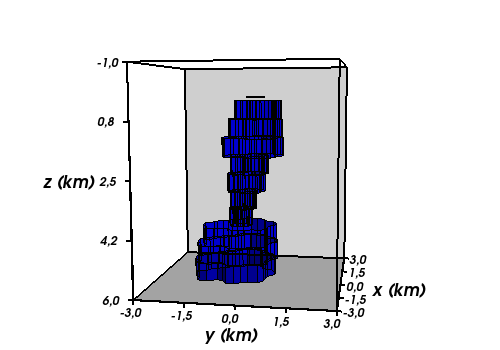

In [95]:
img(filename='data/complex_ib.png')

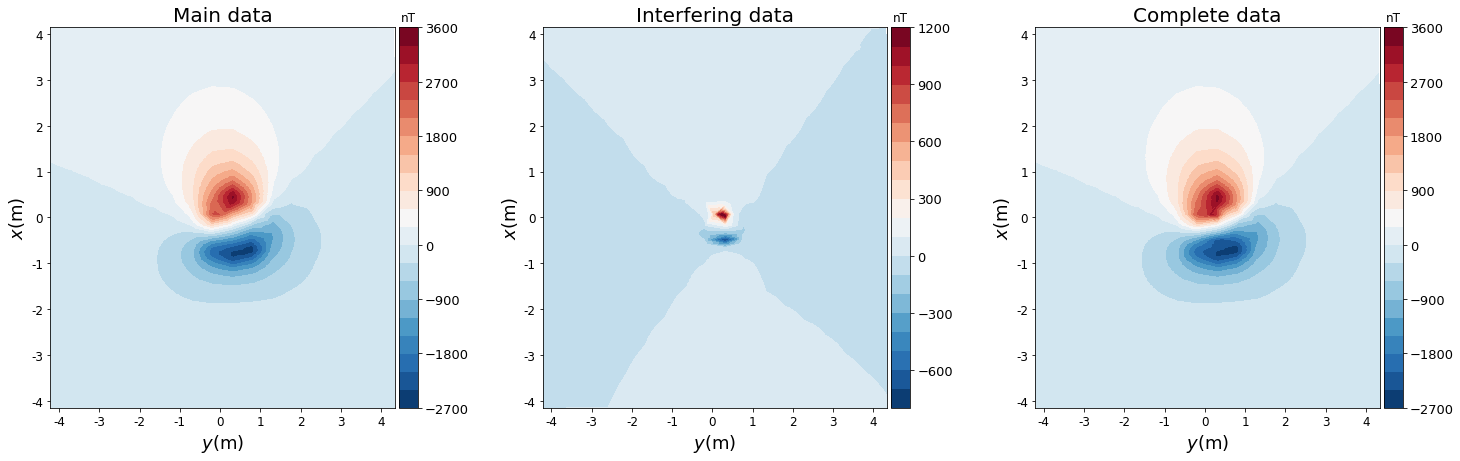

In [108]:
# plot
plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Main data', fontsize=20)
plt.tricontourf(yp, xp, main_data,20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Interfering data', fontsize=20)
plt.tricontourf(yp, xp, inter_datau,20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Complete data', fontsize=20)
plt.tricontourf(yp, xp, both_datau, 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.show()

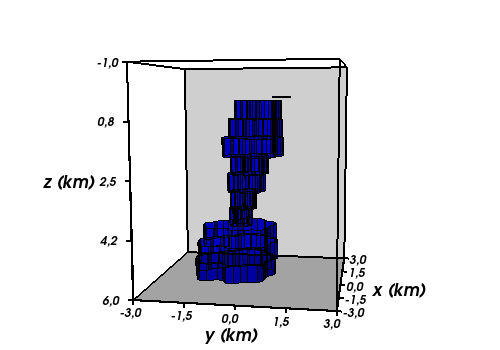

In [97]:
img(filename='data/complex_ib_1200.png')

In [98]:
inter_dataud = polyprism.tf(xp,yp,zp,[modelud['prisms'][-1]],-21.5, -18.7)
both_dataud = polyprism.tf(xp,yp,zp,modelud['prisms'],-21.5, -18.7)

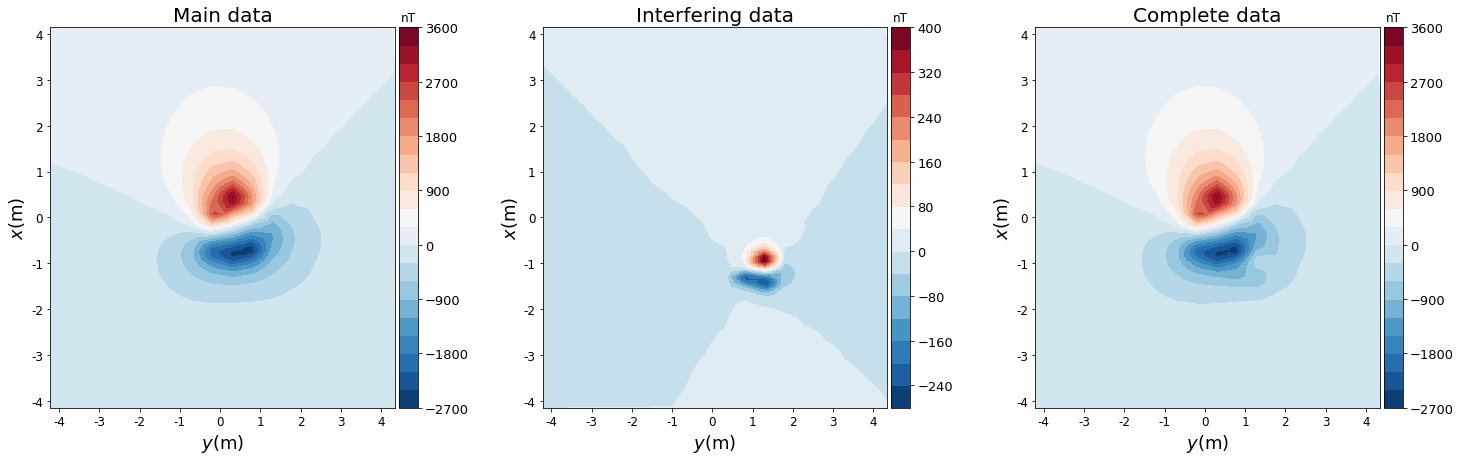

In [107]:
# plot
plt.figure(figsize=(25,7))
plt.subplot(1, 3, 1)
plt.title('Main data', fontsize=20)
plt.tricontourf(yp, xp, main_data,20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 2)
plt.title('Interfering data', fontsize=20)
plt.tricontourf(yp, xp, inter_dataud,20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()

plt.subplot(1, 3, 3)
plt.title('Complete data', fontsize=20)
plt.tricontourf(yp, xp, both_dataud, 20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
mpl.m2km()
plt.show()

# L1 and L2 for interfering upper body ($z0=0$)

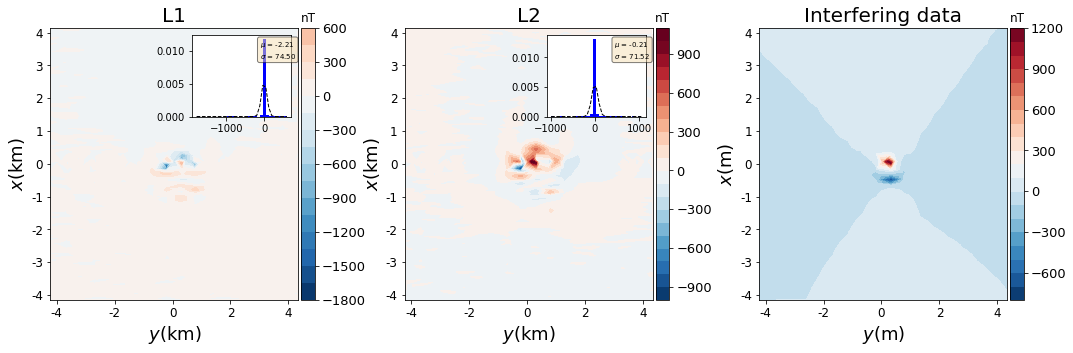

In [104]:
plt.figure(figsize=(18,5))
ax=mpl.subplot(1,3,1)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(L1u0['residual']), vmax=np.min(L1u0['residual'])*(-1))
plt.tricontourf(L1u0['y'], L1u0['x'], L1u0['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.title('L1', fontsize=20)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(L1u0['x']), np.max(L1u0['x']))
#plt.ylim(np.min(L1u0['y']), np.max(L1u0['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(L1u0['residual'])
std = np.std(L1u0['residual'])
nbins=30
n, bins, patches = plt.hist(L1u0['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

ax=mpl.subplot(1,3,2)
plt.title('L2', fontsize=20)
#plt.title('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(L2u0['residual']), vmax=np.min(L2u0['residual'])*(-1))
plt.tricontourf(L2u0['y'], L2u0['x'], L2u0['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(L1u0['x']), np.max(L1u0['x']))
#plt.ylim(np.min(L1u0['y']), np.max(L1u0['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(L2u0['residual'])
std = np.std(L2u0['residual'])
nbins=30
n, bins, patches = plt.hist(L2u0['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

plt.subplot(1, 3, 3)
plt.title('Interfering data', fontsize=20)
plt.tricontourf(yp, xp, inter_datau,20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.show()

In [105]:
L1u0_verts = mfun.plot_prisms(L1u0['prisms'],scale=0.001)
L1u0_initial = mfun.plot_prisms(L1u0['initial_estimate'],scale=0.001)
L2u0_verts = mfun.plot_prisms(L2u0['prisms'],scale=0.001)
L2u0_initial = mfun.plot_prisms(L2u0['initial_estimate'],scale=0.001)
verts_trueu = mfun.plot_prisms(modelu['prisms'],scale=0.001)

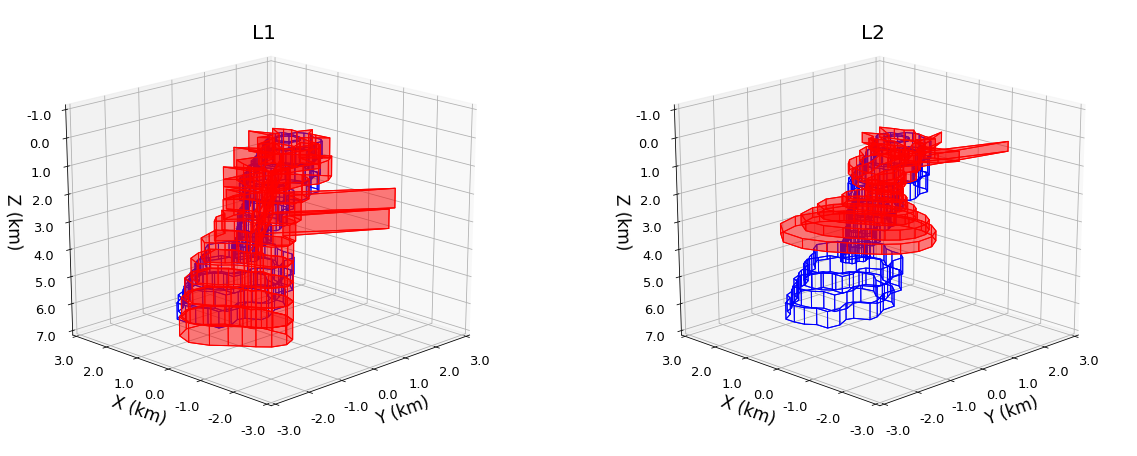

In [106]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121, projection='3d')
plt.title('L1', fontsize=20)
# plot sides
ax.add_collection3d(Poly3DCollection(verts_trueu, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(L1u0_verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

ax = fig.add_subplot(122, projection='3d')
plt.title('L2', fontsize=20)
# plot sides
ax.add_collection3d(Poly3DCollection(verts_trueu, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(L2u0_verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

plt.show()

# L1 and L2 for interfering upper body ($z0=130$)

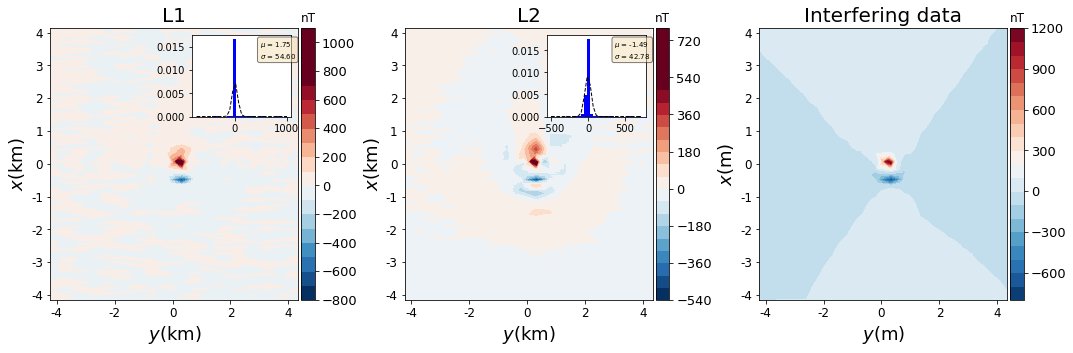

In [78]:
plt.figure(figsize=(18,5))
ax=mpl.subplot(1,3,1)
plt.title('L1', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(L1u130['residual']), vmax=np.min(L1u130['residual'])*(-1))
plt.tricontourf(L1u130['y'], L1u130['x'], L1u130['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(L1u130['x']), np.max(L1u130['x']))
#plt.ylim(np.min(L1u130['y']), np.max(L1u130['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(L1u130['residual'])
std = np.std(L1u130['residual'])
nbins=30
n, bins, patches = plt.hist(L1u130['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

ax=mpl.subplot(1,3,2)
plt.title('L2', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(L2u130['residual']), vmax=np.min(L2u130['residual'])*(-1))
plt.tricontourf(L2u130['y'], L2u130['x'], L2u130['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(L1u130['x']), np.max(L1u130['x']))
#plt.ylim(np.min(L1u130['y']), np.max(L1u130['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(L2u130['residual'])
std = np.std(L2u130['residual'])
nbins=30
n, bins, patches = plt.hist(L2u130['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

plt.subplot(1, 3, 3)
plt.title('Interfering data', fontsize=20)
plt.tricontourf(yp, xp, inter_datau,20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.show()

In [47]:
L1u130_verts = mfun.plot_prisms(L1u130['prisms'],scale=0.001)
L1u130_initial = mfun.plot_prisms(L1u130['initial_estimate'],scale=0.001)
L2u130_verts = mfun.plot_prisms(L2u130['prisms'],scale=0.001)
L2u130_initial = mfun.plot_prisms(L2u130['initial_estimate'],scale=0.001)
verts_trueu = mfun.plot_prisms(modelu['prisms'],scale=0.001)

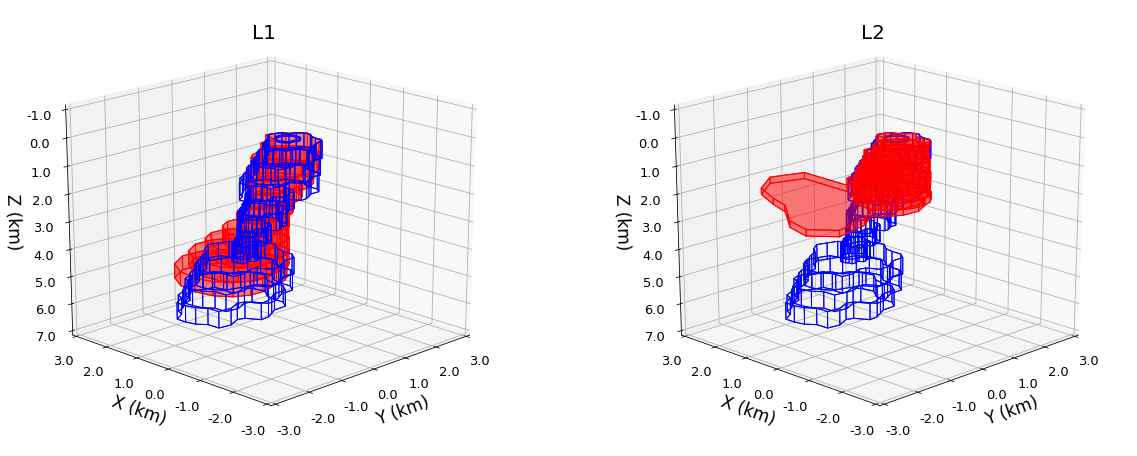

In [84]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121, projection='3d')
plt.title('L1', fontsize=20)
# plot sides
ax.add_collection3d(Poly3DCollection(verts_trueu, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(L1u130_verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

ax = fig.add_subplot(122, projection='3d')
plt.title('L2', fontsize=20)
# plot sides
ax.add_collection3d(Poly3DCollection(verts_trueu, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(L2u130_verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

plt.show()

# L1 and L2 for interfering displaced body ($z0=0$)

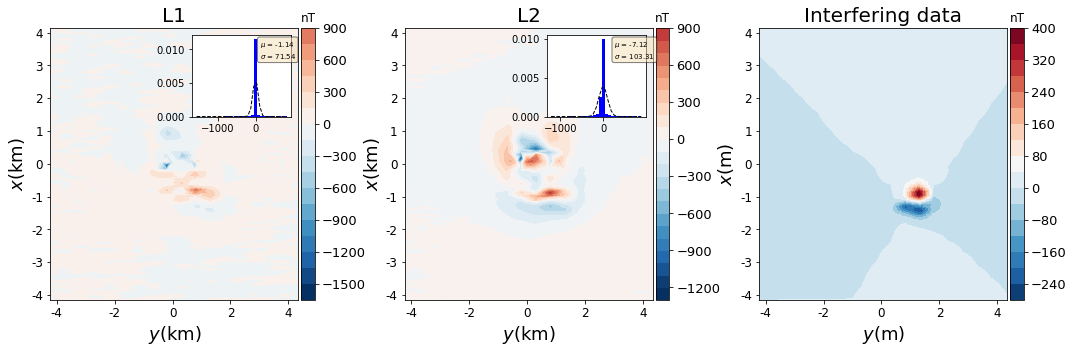

In [79]:
plt.figure(figsize=(18,5))
ax=mpl.subplot(1,3,1)
plt.title('L1', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(L1ud0['residual']), vmax=np.min(L1ud0['residual'])*(-1))
plt.tricontourf(L1ud0['y'], L1ud0['x'], L1ud0['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(L1ud0['x']), np.max(L1ud0['x']))
#plt.ylim(np.min(L1ud0['y']), np.max(L1ud0['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(L1ud0['residual'])
std = np.std(L1ud0['residual'])
nbins=30
n, bins, patches = plt.hist(L1ud0['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

ax=mpl.subplot(1,3,2)
plt.title('L2', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(L2ud0['residual']), vmax=np.min(L2ud0['residual'])*(-1))
plt.tricontourf(L2ud0['y'], L2ud0['x'], L2ud0['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(L1ud0['x']), np.max(L1ud0['x']))
#plt.ylim(np.min(L1ud0['y']), np.max(L1ud0['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(L2ud0['residual'])
std = np.std(L2ud0['residual'])
nbins=30
n, bins, patches = plt.hist(L2ud0['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

plt.subplot(1, 3, 3)
plt.title('Interfering data', fontsize=20)
plt.tricontourf(yp, xp, inter_dataud,20, cmap='RdBu_r').ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.show()

In [54]:
L1ud0_verts = mfun.plot_prisms(L1ud0['prisms'],scale=0.001)
L1ud0_initial = mfun.plot_prisms(L1ud0['initial_estimate'],scale=0.001)
L2ud0_verts = mfun.plot_prisms(L2ud0['prisms'],scale=0.001)
L2ud0_initial = mfun.plot_prisms(L2ud0['initial_estimate'],scale=0.001)
verts_trueud = mfun.plot_prisms(modelud['prisms'],scale=0.001)

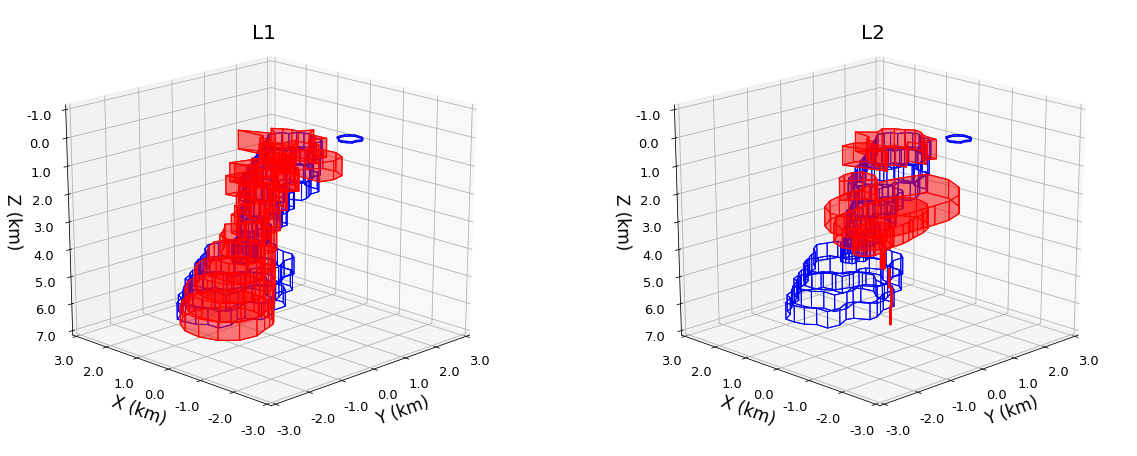

In [83]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121, projection='3d')
plt.title('L1', fontsize=20)
# plot sides
ax.add_collection3d(Poly3DCollection(verts_trueud, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(L1ud0_verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

ax = fig.add_subplot(122, projection='3d')
plt.title('L2', fontsize=20)
# plot sides
ax.add_collection3d(Poly3DCollection(verts_trueud, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(L2ud0_verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

plt.show()

# L1 and L2 for interfering displaced body ($z0=130$)

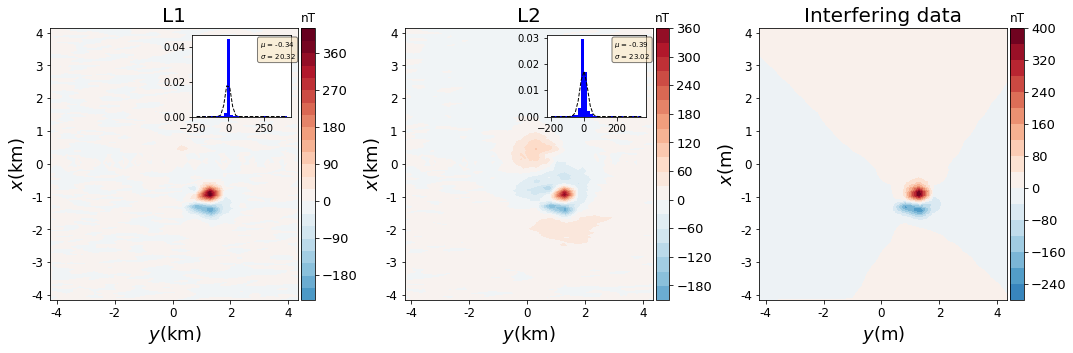

In [111]:
plt.figure(figsize=(18,5))
ax=mpl.subplot(1,3,1)
plt.title('L1', fontsize=20)
norm=mpb.colors.Normalize(vmax=np.max(inter_dataud), vmin=-np.max(inter_dataud))
plt.tricontourf(L1ud130['y'], L1ud130['x'], L1ud130['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(L1ud130['x']), np.max(L1ud130['x']))
#plt.ylim(np.min(L1ud130['y']), np.max(L1ud130['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(L1ud130['residual'])
std = np.std(L1ud130['residual'])
nbins=30
n, bins, patches = plt.hist(L1ud130['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

ax=mpl.subplot(1,3,2)
plt.title('L2', fontsize=20)
plt.tricontourf(L2ud130['y'], L2ud130['x'], L2ud130['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(km)', fontsize=18)
plt.ylabel('$x$(km)', fontsize=18)
#plt.xlim(np.min(L1ud130['x']), np.max(L1ud130['x']))
#plt.ylim(np.min(L1ud130['y']), np.max(L1ud130['y']))
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
mpl.m2km()
clb.ax.set_title('nT')
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(L2ud130['residual'])
std = np.std(L2ud130['residual'])
nbins=30
n, bins, patches = plt.hist(L2ud130['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.68, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')

plt.subplot(1, 3, 3)
plt.title('Interfering data', fontsize=20)
plt.tricontourf(yp, xp, inter_dataud,20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
plt.xlabel('$y$(m)', fontsize=18)
plt.ylabel('$x$(m)', fontsize=18)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.tick_params(labelsize=13)
clb.ax.set_title('nT')
mpl.m2km()
plt.show()

In [57]:
L1ud130_verts = mfun.plot_prisms(L1ud130['prisms'],scale=0.001)
L1ud130_initial = mfun.plot_prisms(L1ud130['initial_estimate'],scale=0.001)
L2ud130_verts = mfun.plot_prisms(L2ud130['prisms'],scale=0.001)
L2ud130_initial = mfun.plot_prisms(L2ud130['initial_estimate'],scale=0.001)
verts_trueud = mfun.plot_prisms(modelud['prisms'],scale=0.001)

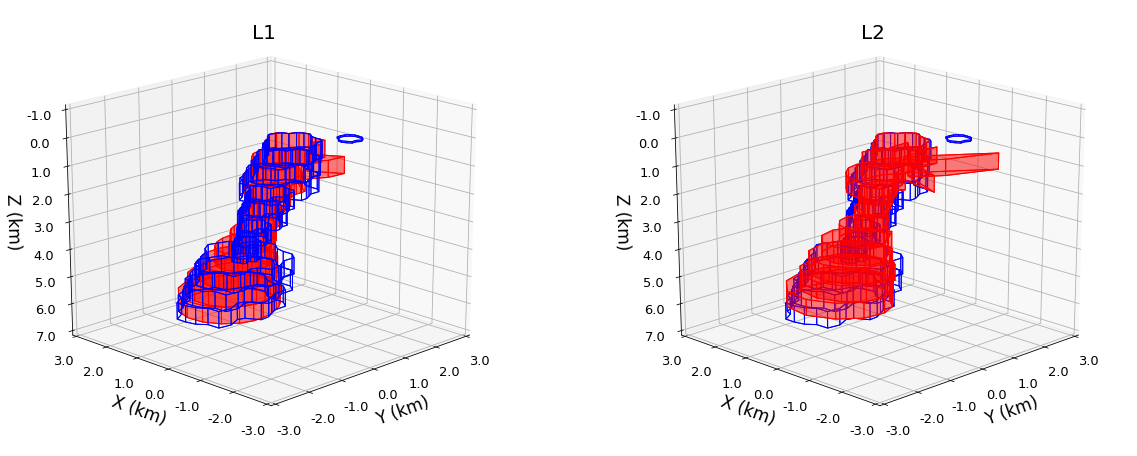

In [82]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(121, projection='3d')
plt.title('L1', fontsize=20)
# plot sides
ax.add_collection3d(Poly3DCollection(verts_trueud, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(L1ud130_verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

ax = fig.add_subplot(122, projection='3d')
plt.title('L2', fontsize=20)
# plot sides
ax.add_collection3d(Poly3DCollection(verts_trueud, 
alpha=0, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(L2ud130_verts, alpha=0.3, 
 facecolor='r', linewidths=1.0, edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=13
ax.zaxis.labelpad=13
ax.xaxis.labelpad=13
ax.view_init(20, -135)
ax.autoscale_view()

plt.show()

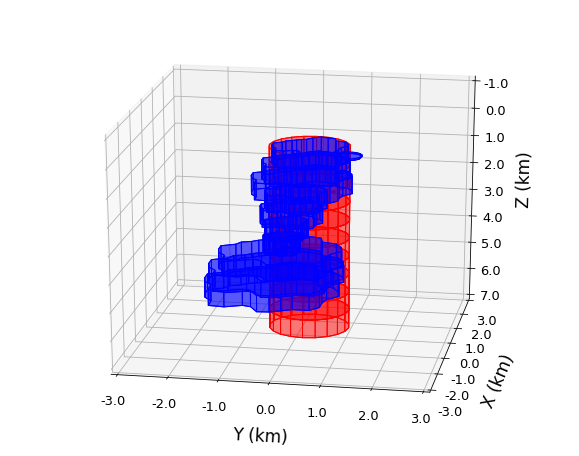

In [21]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_true, 
alpha=0.4, facecolor='b', linewidths=1., edgecolors='b'))
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=0.3, 
 facecolor='r', linewidths=1., edgecolors='r'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 13, pad=8)
ax.set_xlabel('Y (km)', fontsize= 17)
ax.set_ylabel('X (km)', fontsize= 17)
ax.set_zlabel('Z (km)', fontsize= 17)
ax.set_xticklabels(np.linspace(-3, 3, 7))
ax.set_yticklabels(np.linspace(-3, 3, 7))
ax.set_zticklabels(np.linspace(-1, 7, 9))
ax.yaxis.labelpad=20
ax.zaxis.labelpad=20
ax.xaxis.labelpad=20

ax.view_init(20, -80)

#norm=mpb.colors.Normalize(vmin=np.min(inversion['residual']), vmax=np.min(inversion['residual'])*(-1))
#ax.tricontourf(inversion['y'], inversion['x'], inversion['residual'],
#                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)

plt.savefig(mypath+'complex_3d_ini_estimate.png', dpi=300, bbox_inches="tight")
plt.show()

#img(filename=mypath+'kimberlite_3d_estimate.png', width=400, height=400)

In [22]:
# calculate the momentum

volume = 0.
momentum = 0.
for bolacha in model['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*model['intensity']
    
momentum

796.6439017340929

In [23]:
volume = 0.
momentum = 0.
for bolacha in inversion['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*np.linalg.norm(bolacha.props['magnetization'])
    
momentum

701.7982128396015

In [24]:
# calculate the momentum

volume_true = 0.
momentum_true = 0.
for bolacha in model['prisms']:
    area_true = mfun.area_polygon(bolacha.x, bolacha.y)
    volume_true += area_true*(bolacha.z2 - bolacha.z1)
    momentum_true += volume_true*model['intensity']
    
print volume_true/10.**9.    
print momentum_true/10.**9.

1.2617280654398137e-08
7.966439017340929e-07


In [25]:
volume = 0.
momentum = 0.
for bolacha in inversion['prisms']:
    area = mfun.area_polygon(bolacha.x, bolacha.y)
    volume += area*(bolacha.z2 - bolacha.z1)
    momentum += volume*np.linalg.norm(bolacha.props['magnetization'])
    
print volume/10.**9.
print momentum/10.**9.

1.2908288684925242e-08
7.017982128396016e-07


In [26]:
(volume_true - volume)*100./volume_true

-2.306424327857574

In [27]:
((momentum_true - momentum)*100./momentum_true)

11.905656804506528

In [28]:
inversion['estimate'][-1]*len(inversion['initial_estimate'])

6485.7247466973095

In [29]:
model['dz']*model['L']

6000.0

In [30]:
np.std(inversion['residual'])/np.std(inversion['observed_data'])*100

4.134081381237939

/home/leonardo/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


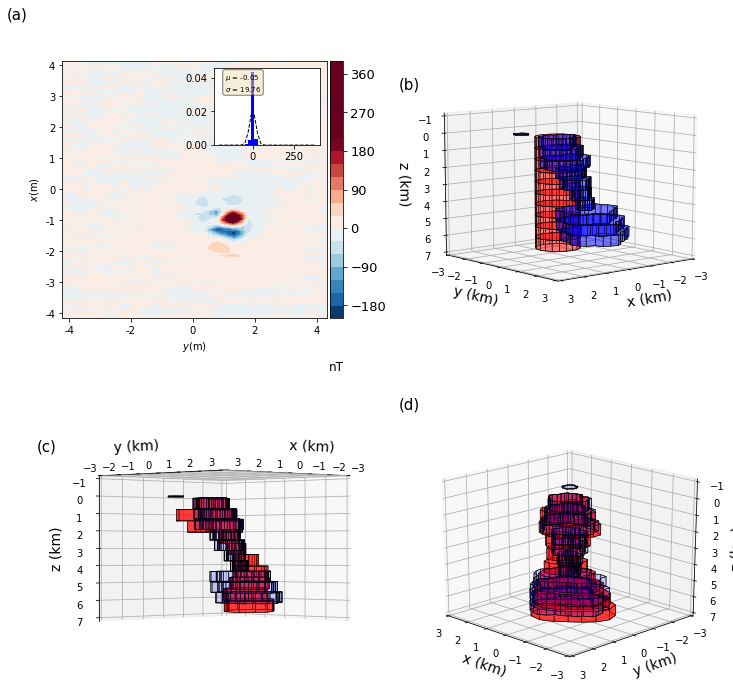

In [31]:
plt.figure(figsize=(10,9))

# residual data and histogram
ax=plt.subplot(2,2,1)
#plt.title('Residual', fontsize=20)
plt.tricontourf(inversion['y'], inversion['x'], inversion['residual'], 20,
                cmap='RdBu_r', vmin=np.min(inversion['residual']),
                vmax=np.min(inversion['residual'])*(-1)).ax.tick_params(labelsize=10)
plt.xlabel('$y$(m)', fontsize=10)
plt.ylabel('$x$(m)', fontsize=10)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-310)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
inset = inset_axes(ax, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(inversion['residual'])
std = np.std(inversion['residual'])
nbins=30
n, bins, patches = plt.hist(inversion['residual'],bins=nbins, normed=True, facecolor='blue')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
inset.text(0.1, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
                transform=inset.transAxes, fontsize=7,
            va='top', ha='left', bbox=props)
gauss = sp.norm.pdf(bins, mean, std)
plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
ax.text(-6000, 5500, '(a)', fontsize= 15)

# initial approximate
ax = plt.subplot(2,2,2, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts_initial, alpha=0.3, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(10, 50)
ax.text2D(-0.1, 0.07, '(b)', fontsize= 15)

# inverse model view 1
ax = plt.subplot(2,2,3, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(0, 45)
ax.text2D(-0.11, 0.07, '(c)', fontsize= 15)

# inverse model view 2
ax = plt.subplot(2,2,4, projection='3d')

# plot sides
ax.add_collection3d(Poly3DCollection(verts, alpha=0.5, 
 facecolor='r', linewidths=0.5, edgecolors='k'))
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.1, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-3, 3, 100)
ax.set_ylim(-3, 3, 100)
ax.set_zlim(7, -1, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(20, 135)
ax.text2D(-0.1, 0.1, '(d)', fontsize= 15)

plt.tight_layout()
plt.savefig(mypath+'results.png', dpi=300, bbox_inches='tight')
plt.show()

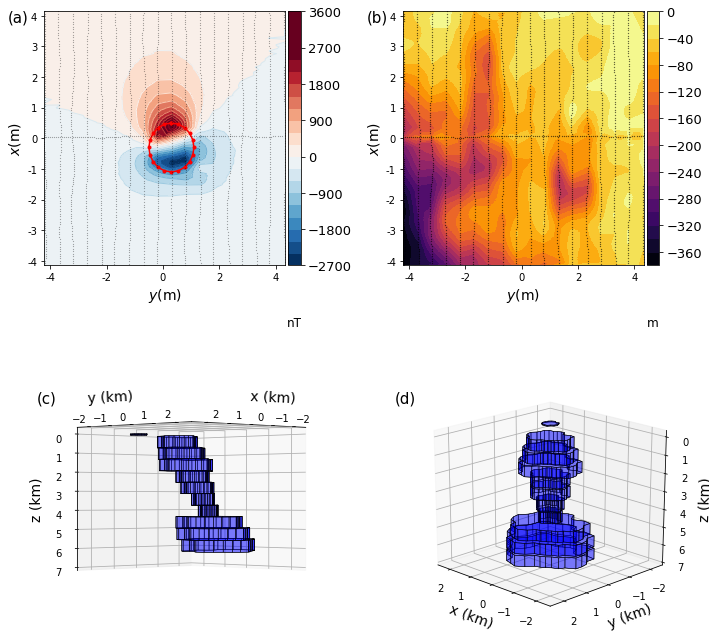

In [32]:
plt.figure(figsize=(10,9))

# sinthetic data
ax=plt.subplot(2,2,1)
plt.tricontour(inversion['y'], inversion['x'], inversion['observed_data'], 20,
                cmap='RdBu_r', linewidths=1)
plt.tricontourf(inversion['y'], inversion['x'], inversion['observed_data'], 20,
                cmap='RdBu_r', vmin=np.min(inversion['observed_data']),
                vmax=-np.min(inversion['observed_data'])).ax.tick_params(labelsize=10)
plt.xlabel('$y$(m)', fontsize=14)
plt.ylabel('$x$(m)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('nT', pad=-315)
yplot = []
xplot = []
for i in range(inversion['initial_estimate'][0].y.size):
    yplot.append(inversion['initial_estimate'][0].y[i]*1000.)
    xplot.append(inversion['initial_estimate'][0].x[i]*1000.)
yplot.append(inversion['initial_estimate'][0].y[0]*1000.)
xplot.append(inversion['initial_estimate'][0].x[0]*1000.)
plt.plot(yplot, xplot, '.-r')
mpl.m2km()
clb.ax.tick_params(labelsize=13)
plt.plot(inversion['y'], inversion['x'], 'k.', markersize=.25, label='Gaussian')
plt.text(-5500, 3800, '(a)', fontsize= 15)

# plot elevation
ax=plt.subplot(2,2,2)
plt.tricontourf(inversion['y'], inversion['x'], inversion['z'], 20,
                cmap='inferno').ax.tick_params(labelsize=10)
plt.xlabel('$y$(m)', fontsize=14)
plt.ylabel('$x$(m)', fontsize=14)
clb = plt.colorbar(pad=0.01, aspect=20, shrink=1)
clb.ax.set_title('m', pad=-315)
mpl.m2km()
clb.ax.tick_params(labelsize=13)
plt.plot(inversion['y'], inversion['x'], 'ko', markersize=.25, label='Gaussian')
plt.text(-5500, 3800, '(b)', fontsize= 15)

# true model
ax = plt.subplot(2,2,3, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-2.5, 2.5, 100)
ax.set_ylim(-2.5, 2.5, 100)
ax.set_zlim(7, -0.2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(0, 45)
ax.text2D(-0.1, 0.07, '(c)', fontsize= 15)

# true model
ax = plt.subplot(2,2,4, projection='3d')
ax.add_collection3d(Poly3DCollection(verts_true, alpha=0.3, 
 facecolor='b', linewidths=0.5, edgecolors='k'))

ax.set_xlim(-2.5, 2.5, 100)
ax.set_ylim(-2.5, 2.5, 100)
ax.set_zlim(7, -0.2, 100)
ax.tick_params(labelsize= 10)
ax.set_ylabel('y (km)', fontsize= 14)
ax.set_xlabel('x (km)', fontsize= 14)
ax.set_zlabel('z (km)', fontsize= 14)
ax.view_init(20, 135)
ax.text2D(-0.1, 0.07, '(d)', fontsize= 15)

plt.tight_layout()

plt.savefig(mypath+'model_data.png', dpi=300, bbox_inches='tight')

plt.show()

In [33]:
xplot

[500.0,
 460.8452130361228,
 347.21359549995793,
 170.22820183397852,
 -52.78640450004204,
 -299.99999999999994,
 -547.2135954999578,
 -770.2282018339783,
 -947.2135954999578,
 -1060.845213036123,
 -1100.0,
 -1060.845213036123,
 -947.213595499958,
 -770.2282018339786,
 -547.213595499958,
 -300.00000000000017,
 -52.78640450004221,
 170.22820183397835,
 347.2135954999578,
 460.8452130361228,
 500.0]